In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = 'games.csv'
games = pd.read_csv(file_path)

games.head(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85103 entries, 0 to 85102
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       85103 non-null  int64  
 1   Name                        85097 non-null  object 
 2   Release date                85103 non-null  object 
 3   Estimated owners            85103 non-null  object 
 4   Peak CCU                    85103 non-null  int64  
 5   Required age                85103 non-null  int64  
 6   Price                       85103 non-null  float64
 7   DLC count                   85103 non-null  int64  
 8   About the game              81536 non-null  object 
 9   Supported languages         85103 non-null  object 
 10  Full audio languages        85103 non-null  object 
 11  Reviews                     9743 non-null   object 
 12  Header image                85103 non-null  object 
 13  Website                     394

In [6]:
df_summary = {
    'columns': games.columns,
    'types': games.dtypes,
    'missing': games.isna().sum(),
    'size': games.shape[0],
    'unique': games.nunique()
}

print(pd.DataFrame(df_summary))

                                               columns    types  missing  \
AppID                                            AppID    int64        0   
Name                                              Name   object        6   
Release date                              Release date   object        0   
Estimated owners                      Estimated owners   object        0   
Peak CCU                                      Peak CCU    int64        0   
Required age                              Required age    int64        0   
Price                                            Price  float64        0   
DLC count                                    DLC count    int64        0   
About the game                          About the game   object     3567   
Supported languages                Supported languages   object        0   
Full audio languages              Full audio languages   object        0   
Reviews                                        Reviews   object    75360   
Header image

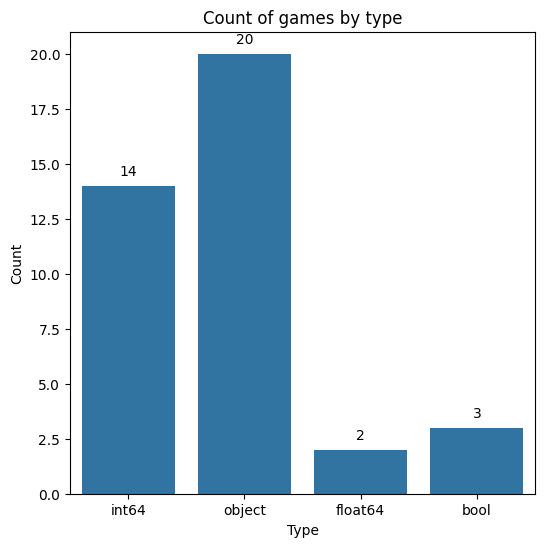

In [7]:
# Crear la gráfica de barras
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='types', data=df_summary)

# Agregar los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Añadir etiquetas y título
plt.title('Count of games by type')
plt.xlabel('Type')
plt.ylabel('Count')

# Mostrar la gráfica
plt.show()

In [ ]:
def capitalize_next_word(column_name):
    result = ""
    capitalize_next = True
    for char in column_name:
        if char == " ":
            capitalize_next = True
        elif capitalize_next:
            result += char.upper()
            capitalize_next = False
        else:
            result += char
    return result

games.rename(columns=capitalize_next_word, inplace=True)
games.columns
